
Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---



# Define ML problems
- Choose a target to predict, and check its distribution
- Avoid leakage of information from test to train or from target to features
- Choose an appropriate evaluation metric


### Setup


In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Choose a target to predict, and check its distribution

## Overview

This is the data science process at a high level:

<img src="https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295">

—Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

We've focused on the 2nd arrow in the diagram, by training predictive models. Now let's zoom out and focus on the 1st arrow: defining problems, by translating business questions into code/data questions.

Last sprint, you did a Kaggle Challenge. It’s a great way to practice model validation and other technical skills. But that's just part of the modeling process. [Kaggle gets critiqued](https://speakerdeck.com/szilard/machine-learning-software-in-practice-quo-vadis-invited-talk-kdd-conference-applied-data-science-track-august-2017-halifax-canada?slide=119) because some things are done for you: Like [**defining the problem!**](https://www.linkedin.com/pulse/data-science-taught-universities-here-why-maciej-wasiak/) In today’s module, you’ll begin to practice this objective, with your dataset you’ve chosen for your personal portfolio project.

When defining a supervised machine learning problem, one of the first steps is choosing a target to predict.

Which column in your tabular dataset will you predict?

Is your problem regression or classification? You have options. Sometimes it’s not straightforward, as we'll see below.

- Discrete, ordinal, low cardinality target: Can be regression or multi-class classification.
- (In)equality comparison: Converts regression or multi-class classification to binary classification.
- Predicted probability: Seems to [blur](https://brohrer.github.io/five_questions_data_science_answers.html) the line between classification and regression.

## Follow Along

Let's reuse the [Burrito reviews dataset.](https://nbviewer.jupyter.org/github/LambdaSchool/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/LS_DS_214_assignment.ipynb) 🌯


In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

### Choose your target 

Which column in your tabular dataset will you predict?


In [ ]:
#Our business problem is: We are an burrito startup designing our next gen burrito. 
#We want to know what makes a burrito good and a bad burrito bad.

#What are the columns?
df.head()
df.columns

#Which column should we use for our predictive model?
df['overall'].describe()

#What is the distribution for this column?

#What is the count of each unique value in this column?
df['overall'].value_counts()

#what is the percent of each unique value in this column?
df['overall'].value_counts(normalize = True) 

#Should we make any modifications to this variable for our predictive model?
df = df.dropna(subset=['overall'])

df['Great'] = df['overall'] >= 4


### How is your target distributed?

For a classification problem, determine: How many classes? Are the classes imbalanced?

In [ ]:
#How many classes do I have? What are the classes named?
y = df['Great']

y.unique()
y.nunique()
#What is the frequency of the classes?

y.value_counts(normalize = True)

False    0.567696
True     0.432304
Name: Great, dtype: float64

# Avoid leakage of information from test to train or from target to features

## Overview

Overfitting is our enemy in applied machine learning, and leakage is often the cause.

> Make sure your training features do not contain data from the “future” (aka time traveling). While this might be easy and obvious in some cases, it can get tricky. … If your test metric becomes really good all of the sudden, ask yourself what you might be doing wrong. Chances are you are time travelling or overfitting in some way. — [Xavier Amatriain](https://www.quora.com/What-are-some-best-practices-for-training-machine-learning-models/answer/Xavier-Amatriain)

Choose train, validate, and test sets. Are some observations outliers? Will you exclude them? Will you do a random split or a time-based split? You can (re)read [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/).

## Follow Along

First, begin to **explore and clean your data.**

In [ ]:
#How many kinds of burritos do we have?
df['Burrito'].nunique()



132

In [ ]:
#What are the names of these burritos?
df['Burrito'].unique()

array(['California ', 'Carnitas', 'Carne asada', 'California',
       'combo chicken', 'Monster California', 'Carne Asada',
       'Surf & Turf', 'Chile verde pork', 'battered fish ',
       'Surf and turf ', 'Adobada ', 'Barbacoa', '2 in 1', 'Adobado',
       'Shredded beef', 'Hawaiian', 'Bandido', 'Campeon', 'carne asada',
       'California chicken', 'Azteca', 'Lobster', 'Al pastor', 'Custom',
       'Machaca', 'Quesaburro', 'Philly ', 'Quesa', 'Surf and turf',
       'Mahi', 'Addiction', 'Oaxacalifornia', "Deborah's special",
       'Chicken nopalito', 'Adobada', 'Chicken', 'California Everything',
       'Chile relleno and carnitas', 'California (only cheese)', 'Fish',
       'Chimichanga beef', 'Pastor', 'El Hawaiiano ', 'Shrimp',
       'El Rusio', 'Bacon breakfast', 'Chile Relleno', 'Bomb', 'Arizona',
       'California Burrito', '619 Burrito Original', 'Chicken asada',
       'Carne adobada ', 'Bean and cheese', 'Pokirrito classic ',
       'Mauna Lani', 'Especial ', 'Ranchero

In [ ]:
#Combine burrito categories

#Make all the burrito names lowercase
df['Burrito'] = df['Burrito'].str.lower()


#Create logical vectors of whether or not the observation is a certain burrito
#type (e.g. California, Asada, Surf & Turf, Carnitas, and other)
california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

#Rename values to simpler versions of the burrito types
df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

df['Burrito'].value_counts()

California     169
Other          156
Asada           43
Surf & Turf     28
Carnitas        25
Name: Burrito, dtype: int64

In [ ]:
#Drop some of the high cardinality features
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])


In [ ]:
#Count the missing values
df.isna().sum().sort_values()

Burrito       0
overall       0
Tortilla      0
Great         0
Date          0
           ... 
Ham         419
Lobster     420
Zucchini    420
Carrots     420
Queso       421
Length: 61, dtype: int64

In [ ]:
#Fill in the missing values with the value "Missing"
df = df.fillna('Missing')

Next, do a **time-based split:**

- Train on reviews from 2016 & earlier. 
- Validate on 2017. 
- Test on 2018 & later.

In [ ]:
#Convert 'Date' column to a datetime variable type
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Set training set equal to values from 2016 and earlier
train = df[df['Date'].dt.year <= 2016]

#Set validation set equal to year 2017
val = df[df['Date'].dt.year == 2017]

#Set test set equal to values from after 2018
test = df[df['Date'].dt.year >= 2018]


In [ ]:
#What is the shape of each of these dataframes?
train.shape

(298, 61)

Begin to choose which features, if any, to exclude. **Would some features “leak” future information?**

What happens if we _DON’T_ drop features with leakage?

In [ ]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

#Set target
target = 'Great'

#Set features
features = train.columns.drop([target, 'Date'])

#define x_train, y_train, x_val, and y_val
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


#Define pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = 3)
)

#Run pipeline on training
pipeline.fit(X_train, y_train)

#Print validation accuracy
print('Accuracy', pipeline.score(X_val, y_val))


Accuracy 1.0


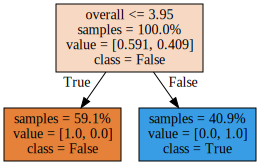

In [ ]:
# This score is too good to be true.
# Visualize the decision tree, to see what the model "learned"
import graphviz
from sklearn.tree import export_graphviz


tree = pipeline.named_steps['decisiontreeclassifier']


dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)



Drop the column with “leakage”.

Accuracy 0.8


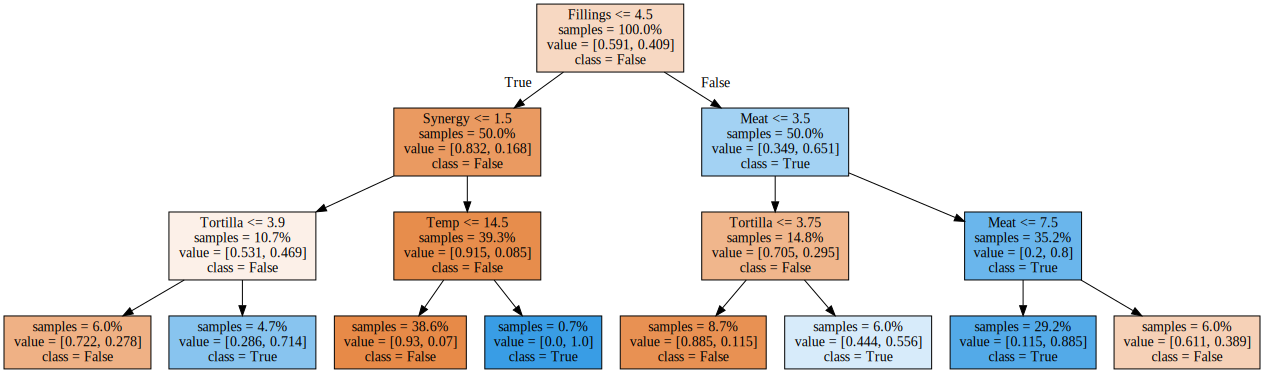

In [ ]:
#Drop column with leakage
features = train.columns.drop([target, 'Date', 'overall'])

#redefine x_train and x_val
X_train = train[features]
X_val = val[features]


#Define pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = 3)
)

#Run pipeline on training
pipeline.fit(X_train, y_train)

#Print validation accuracy
print('Accuracy', pipeline.score(X_val, y_val))


tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)




# Choose an appropriate evaluation metric

## Overview

How will you evaluate success for your predictive model? You must choose an appropriate evaluation metric, depending on the context and constraints of your problem.

**Classification & regression metrics are different!**

- Don’t use _regression_ metrics to evaluate _classification_ tasks.
- Don’t use _classification_ metrics to evaluate _regression_ tasks.

[Scikit-learn has lists of popular metrics.](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

## Follow Along

For classification problems: 

As a rough rule of thumb, if your majority class frequency is >= 50% and < 70% then you can just use accuracy if you want. Outside that range, accuracy could be misleading — so what evaluation metric will you choose, in addition to or instead of accuracy? For example:

- Precision?
- Recall?
- ROC AUC?


In [ ]:
#calculate the distribution of classes
y.value_counts(normalize= True)

False    0.567696
True     0.432304
Name: Great, dtype: float64

### Precision & Recall

Let's review Precision & Recall. What do these metrics mean, in scenarios like these?

- Predict great burritos
- Predict fraudulent transactions
- Recommend Spotify songs

[Are false positives or false negatives more costly? Can you optimize for dollars?](https://alexgude.com/blog/machine-learning-metrics-interview/)

### ROC AUC 

Let's also review ROC AUC (Receiver Operating Characteristic, Area Under the Curve).

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. **The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.**"

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures **how well a classifier ranks predicted probabilities.** So, when you get your classifier’s ROC AUC score, you need to **use predicted probabilities, not discrete predictions.**

ROC AUC ranges **from 0 to 1.** Higher is better. A naive majority class **baseline** will have an ROC AUC score of **0.5**, regardless of class (im)balance.

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [StatQuest video](https://youtu.be/4jRBRDbJemM)
- [Data School article / video](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


In [ ]:
# Use sklearn to calculate ROC AUC 
# (You'll need to be able to do this on the Sprint Challenge)
from sklearn.metrics import roc_auc_score


# Get predicted probabilities
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]

#calculate AUC
auc = roc_auc_score(y_val, y_pred_proba)

auc

0.8549832026875699

In [ ]:
# Use sklearn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
#See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.885057
1,0.021277,0.605263,0.885057
2,0.106383,0.657895,0.714286
3,0.127660,0.710526,0.555556
4,0.148936,0.736842,0.388889
5,0.255319,0.789474,0.277778
6,0.276596,0.842105,0.115385
7,1.000000,1.000000,0.069565


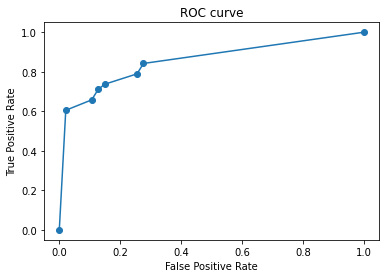

In [ ]:
%matplotlib inline
#See the results in plot (ROC Curve)
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


### Imbalanced classes

Do you have highly imbalanced classes?

If so, you can try ideas from [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/):

- “Adjust the class weight (misclassification costs)” — most scikit-learn classifiers have a `class_balance` parameter.
- “Adjust the decision threshold” — we did this last module. Read [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).
- “Oversample the minority class, undersample the majority class, or synthesize new minority classes” — try the the [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library as a stretch goal.

# BONUS: Regression example 🏘️


In [ ]:
# Read our NYC apartment rental listing dataset
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')

### Choose your target

Which column in your tabular dataset will you predict?


In [ ]:
y = df['price']

### How is your target distributed?

For a regression problem, determine: Is the target right-skewed?


In [ ]:
# Yes, the target is right-skewed
import seaborn as sns
sns.distplot(y);

In [ ]:
y.describe()

### Are some observations outliers? 

Will you exclude
them?


In [ ]:
# Yes! There are outliers
# Some prices are so high or low it doesn't really make sense.
# Some locations aren't even in New York City

# Remove the most extreme 1% prices, 
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
import numpy as np
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
# The distribution has improved, but is still right-skewed
y = df['price']
sns.distplot(y);

In [ ]:
y.describe()

### Log-Transform

If the target is right-skewed, you may want to “log transform” the target.


> Transforming the target variable (using the mathematical log function) into a tighter, more uniform space makes life easier for any [regression] model.
>
> The only problem is that, while easy to execute, understanding why taking the log of the target variable works and how it affects the training/testing process is intellectually challenging. You can skip this section for now, if you like, but just remember that this technique exists and check back here if needed in the future.
>
> Optimally, the distribution of prices would be a narrow “bell curve” distribution without a tail. This would make predictions based upon average prices more accurate. We need a mathematical operation that transforms the widely-distributed target prices into a new space. The “price in dollars space” has a long right tail because of outliers and we want to squeeze that space into a new space that is normally distributed. More specifically, we need to shrink large values a lot and smaller values a little. That magic operation is called the logarithm or log for short. 
>
> To make actual predictions, we have to take the exp of model predictions to get prices in dollars instead of log dollars. 
>
>— Terence Parr & Jeremy Howard, [The Mechanics of Machine Learning, Chapter 5.5](https://mlbook.explained.ai/prep.html#logtarget)

[Numpy has exponents and logarithms](https://docs.scipy.org/doc/numpy/reference/routines.math.html#exponents-and-logarithms). Your Python code could look like this:

```python
import numpy as np
y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
print(mean_absolute_error(y_val, y_pred))
```

In [ ]:
sns.distplot(y)
plt.title('Original target, in the unit of US dollars');

In [ ]:
y_log = np.log1p(y)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

In [ ]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

## Challenge

You will use your portfolio project dataset for all assignments this sprint. (If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.)

Complete these tasks for your project, and document your decisions.

- Choose your target. Which column in your tabular dataset will you predict?
- Is your problem regression or classification?
- How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- Begin to clean and explore your data.
- Begin to choose which features, if any, to exclude. Would some features "leak" future information?

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)